**import libraries**

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


**read data**

In [46]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\predictive_maintenance.csv")

In [47]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [49]:
df.duplicated().sum()

0

In [50]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<Axes: >

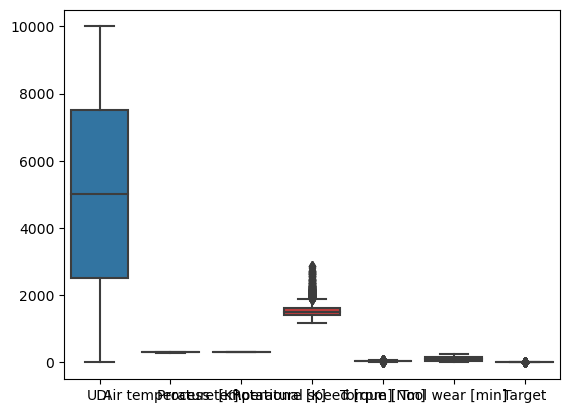

In [51]:
sns.boxplot(df)

**feature extraction**

In [52]:
df.drop('UDI',axis=1,inplace=True)
df.drop('Product ID',axis=1,inplace=True)
df.drop('Failure Type',axis=1,inplace=True)

In [53]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


**EDA**

**univariate **

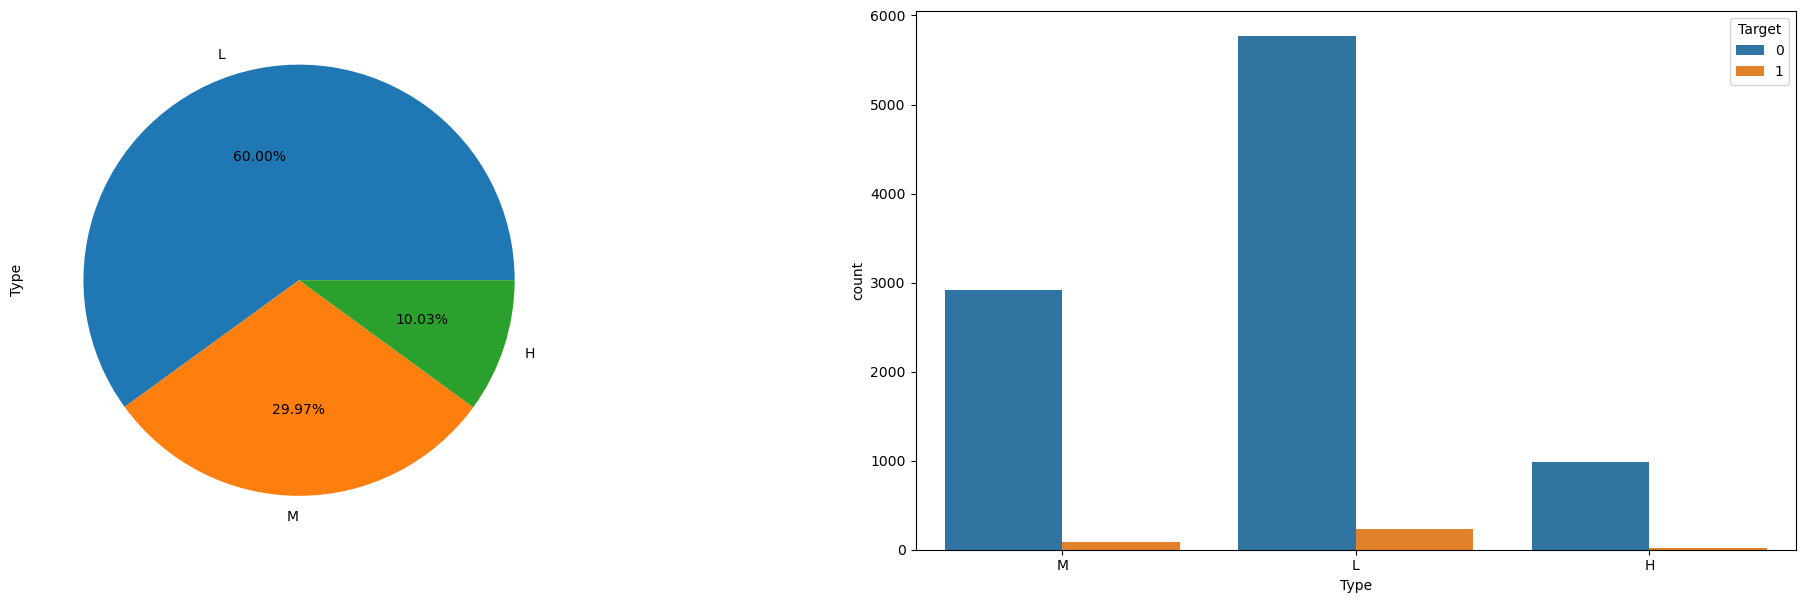

In [54]:
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
df['Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Type',hue = 'Target' ,data = df)
plt.show()

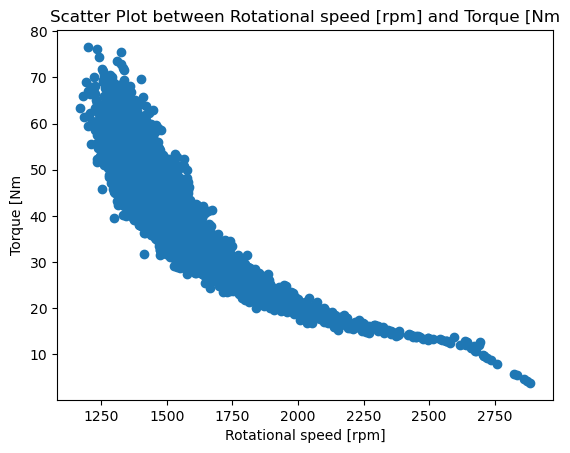

In [55]:
plt.scatter(x=df['Rotational speed [rpm]'], y=df['Torque [Nm]']) # 'data1' and 'data2' are your numerical variables
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm')
plt.title('Scatter Plot between Rotational speed [rpm] and Torque [Nm')
plt.show()


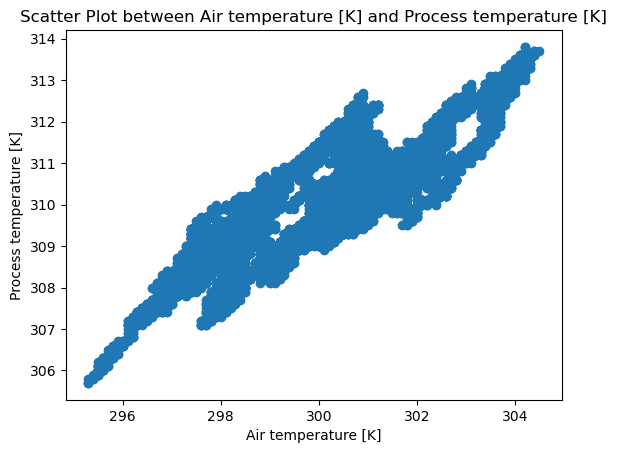

In [56]:
plt.scatter(x=df['Air temperature [K]'], y=df['Process temperature [K]']) # 'data1' and 'data2' are your numerical variables
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot between Air temperature [K] and Process temperature [K]')
plt.show()


**Bi_variate analysis**

C:\Users\Admin\AppData\Local\Temp\ipykernel_4156\1613461919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(x = 'index', y = 'Target',data = df.corr()['Target'].sort_values(ascending = False).reset_index()[1:])


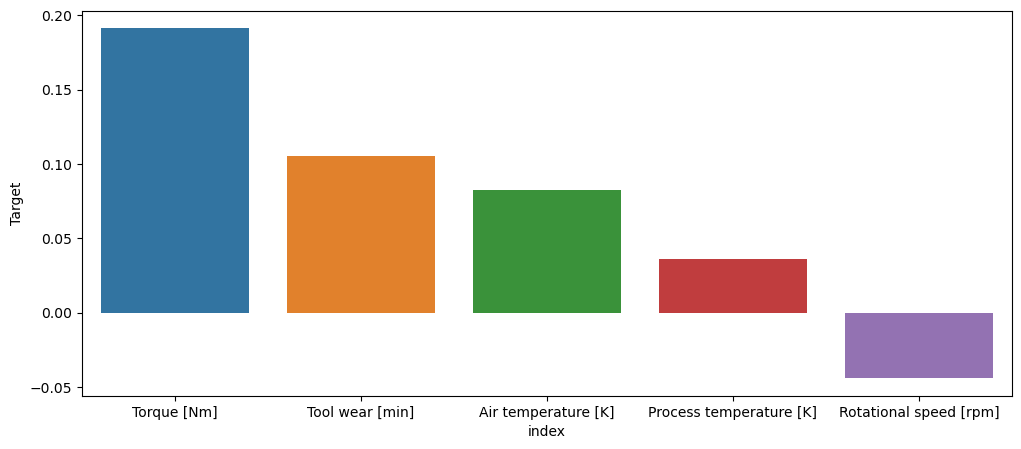

In [57]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'index', y = 'Target',data = df.corr()['Target'].sort_values(ascending = False).reset_index()[1:])
plt.show()

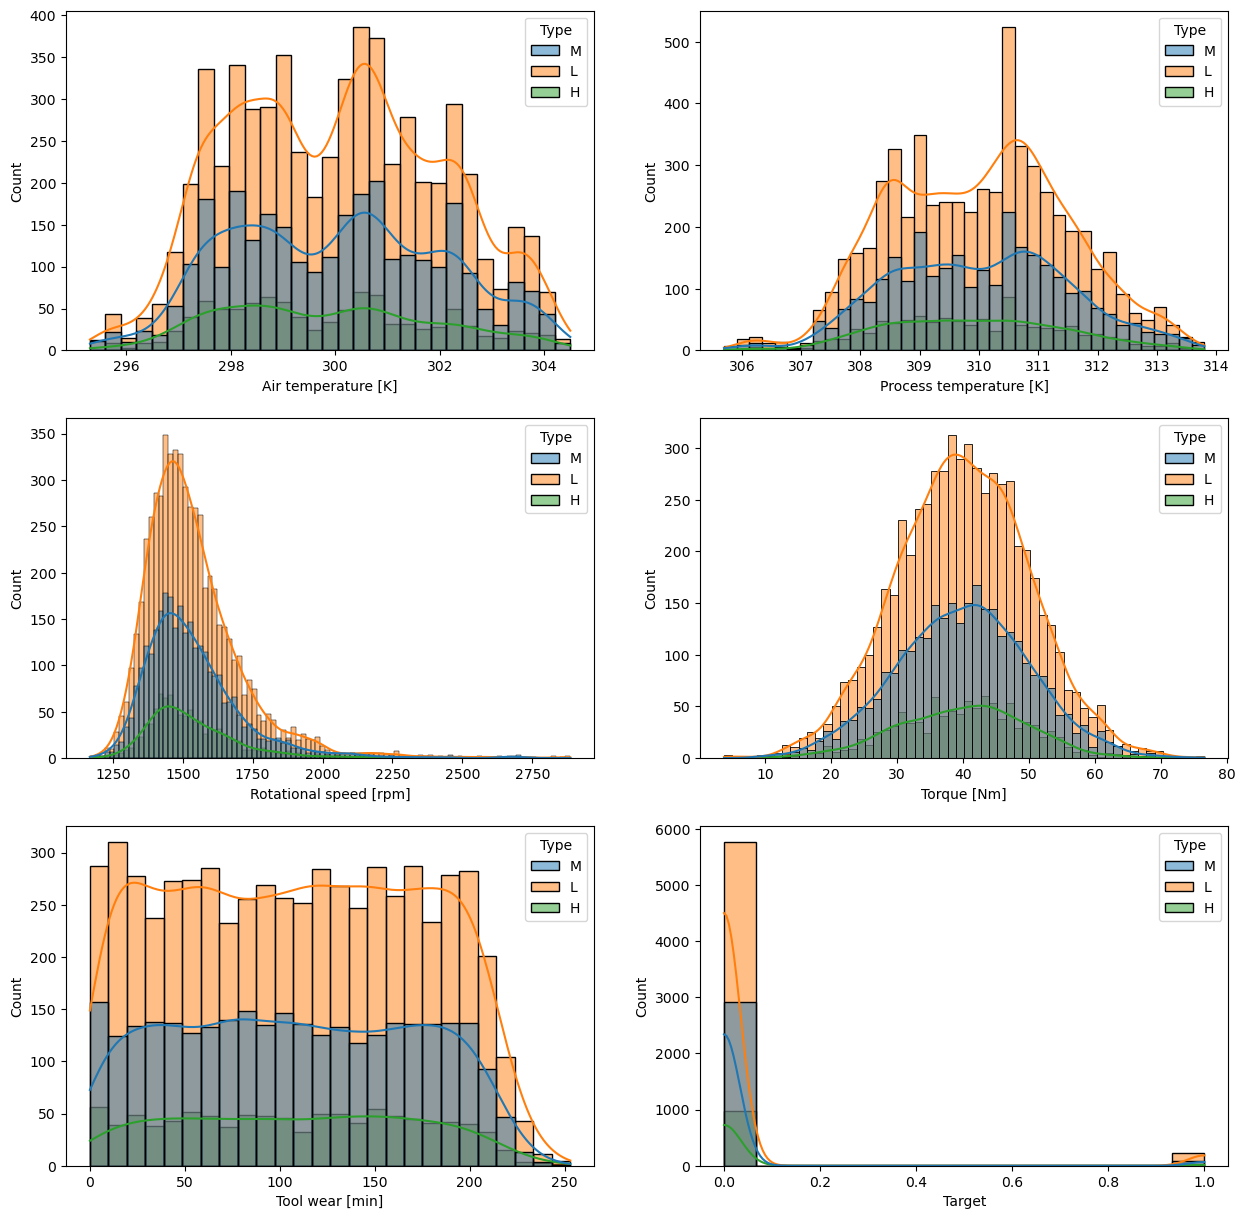

In [58]:
plt.figure(figsize = (15,15))
for i,col in enumerate(df.select_dtypes('number').columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x = col, data = df, kde = True, hue = 'Type')
plt.show()

**Multivariate analysis**

C:\Users\Admin\AppData\Local\Temp\ipykernel_4156\1727064982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # 'data' is your DataFrame, .corr() computes correlation matrix


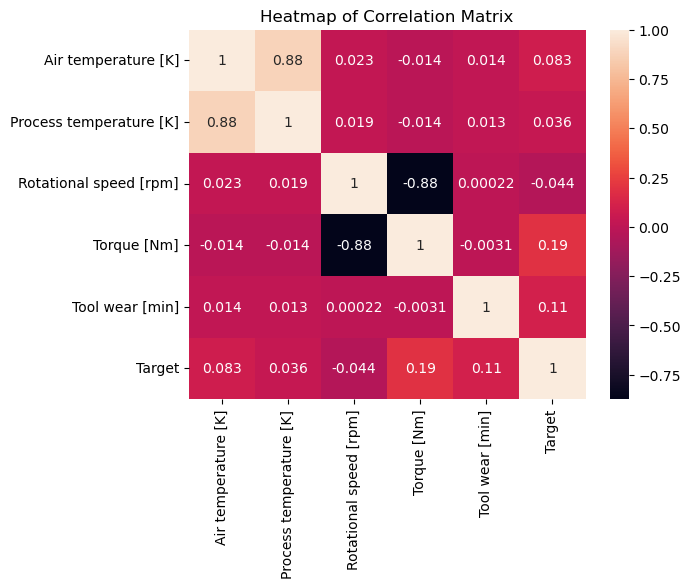

In [59]:
sns.heatmap(df.corr(), annot=True) # 'data' is your DataFrame, .corr() computes correlation matrix
plt.title('Heatmap of Correlation Matrix')
plt.show()


**conversion of imbalance data in balanced**

In [63]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type']) 
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [66]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming your dataset is stored in a pandas DataFrame named df

# Step 1: Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Step 2: (Optional) Encode categorical variables
# No categorical variables present in the given example

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

# Now X_balanced and y_balanced contain the balanced dataset


*seperation of input and target variables


In [72]:
X=df.drop('Target',axis=1)
y=df[['Target']]

splitting the data in to X_train,X_test,y_train,y_test


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [74]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type']) 
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [75]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
52,0,298.8,309.0,1497,43.8,147
4720,2,303.4,311.7,1353,44.1,192
1448,2,299.0,310.3,1657,31.0,70
9354,2,298.2,308.8,1607,31.9,39
8123,0,300.2,311.5,1515,36.8,27
...,...,...,...,...,...,...
347,1,297.5,308.3,1544,40.8,37
6175,1,300.9,310.8,1517,44.3,4
9704,1,298.9,310.1,1577,41.4,80
9256,1,298.2,309.1,1569,35.2,199


**Model_Building**

In [76]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

C:\Users\Admin\Documents\Python Scripts\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

**Model_evaluation**

In [77]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.982


In [78]:
accuracy_score(y_test,y_pred)

0.982

In [79]:
confusion_matrix(y_test,y_pred)

array([[1915,    4],
       [  32,   49]], dtype=int64)

In [80]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1919\n           1       0.92      0.60      0.73        81\n\n    accuracy                           0.98      2000\n   macro avg       0.95      0.80      0.86      2000\nweighted avg       0.98      0.98      0.98      2000\n'

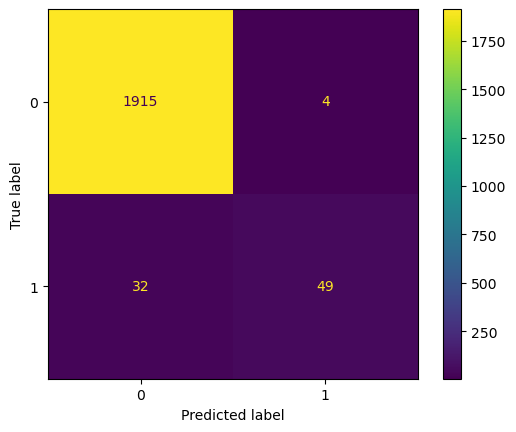

In [81]:

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [82]:
pipe=Pipeline([('encoder',LabelEncoder()),
              ("Estimator",rf_classifier)])

In [83]:
import pickle

In [84]:
with open('failure.pkl','wb') as f:
 pickle.dump(rf_classifier,f)
        

In [85]:
predict=pickle.load(open('failure.pkl','rb'))

In [86]:
import os 

In [87]:
os.getcwd()

'C:\\Users\\Admin'